<a href="https://colab.research.google.com/github/VivanKwong/2023BTTAI-Studio-Project/blob/main/ContentBasedFiltering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To Do:
* ADD A NEW COLUMN RATINGS ON ROWS WHERE THE USERID AND PLACEID MATCH IN THE DATASET (USE USERSRASTAURANTRATINGSNEW.CSV)
* TRAIN IT INTO A DECISION TREE MODEL


* play around with different models for a better result - classification models (our task is a classification model with 3 options) - Gradient boosted tree perhaps?
* look over distributions with ratings, tendency for more 3s
- FROM MEETING WITH DAVID


*   UsersRestaurantRatingsNew.csv FOR TRAINING AFTER
MEAN SQUARED ERROR LOSS, LINEAR REGRESSION
PREDICT RATINGS FOR EACH USER (FOR ALL RESTAURANT IDS)



In [ ]:
#import packages
import pandas as pd
import os
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import folium

In [ ]:
# get UsersPreferredCuisine file
userCuisines = pd.read_csv('UsersPreferredCuisine.csv')


In [ ]:
#get RestaurantsTypeOfCuisine file
restaurantCuisines = pd.read_csv('RestaurantsTypeOfCuisine.csv')

In [ ]:
# get UsersRestaurantsRatings file
trainingSet = pd.read_csv('UsersRestaurantRatingsNew.csv')


In [ ]:
# display restaurant ratings dataset
trainingSet.head(10)

,userID,userIDnum,placeID,rating,food_rating,service_rating
0,U1001,1,132825,3,3,2
1,U1001,1,132830,2,2,2
2,U1001,1,135025,3,3,3
3,U1001,1,135033,2,2,2
4,U1001,1,135039,2,2,2
5,U1001,1,135040,2,2,2
6,U1001,1,135045,2,2,2
7,U1001,1,135051,2,2,3
8,U1001,1,135085,1,2,2
9,U1002,2,132825,3,3,1


In [ ]:
#Group and rename cuisines for restaurants
cuisines_to_replace = ['Hot_Dogs', 'Burgers', 'Pizzeria', 'Fast_Food', 'Doughnuts', 'Cafeteria', 'Deli-Sandwiches', 'Soup', 'Game']
restaurantCuisines['Rcuisine'] = restaurantCuisines['Rcuisine'].replace(cuisines_to_replace, 'Fast_Food')

cuisines_to_replace = ['Bar', 'Bar_Pub_Brewery']
restaurantCuisines['Rcuisine'] = restaurantCuisines['Rcuisine'].replace(cuisines_to_replace, '21+')

cuisines_to_replace = ['American', 'Pacific-Northwest', 'Contemporary', 'Family', 'Diner', 'Barbecue', 'Tex-Mex', 'Steaks', 'Canadian', 'Southwestern', 'Cajun-Creole', 'California', 'Southern']
restaurantCuisines['Rcuisine'] = restaurantCuisines['Rcuisine'].replace(cuisines_to_replace, 'American')

cuisines_to_replace = ['Afghan', 'Mongolian', 'Tibetan']
restaurantCuisines['Rcuisine'] = restaurantCuisines['Rcuisine'].replace(cuisines_to_replace, 'Central-Asian')

cuisines_to_replace = ['Indian-Pakistani']
restaurantCuisines['Rcuisine'] = restaurantCuisines['Rcuisine'].replace(cuisines_to_replace, 'South-Asian')

cuisines_to_replace = ['Japanese', 'Sushi', 'Chinese', 'Dim-Sum', 'Korean']
restaurantCuisines['Rcuisine'] = restaurantCuisines['Rcuisine'].replace(cuisines_to_replace, 'East-Asian')

cuisines_to_replace = ['Thai', 'Malaysian', 'Cambodian', 'Filipino', 'Thai', 'Indonesian', 'Southeast_Asian', 'Burmese', 'Vietnamese']
restaurantCuisines['Rcuisine'] = restaurantCuisines['Rcuisine'].replace(cuisines_to_replace, 'Southeast Asian')

cuisines_to_replace = ['Breakfast-Brunch', 'Cafe-Coffee_Shop', 'Bagels', 'Bakery', 'Juice', 'Tea_House']
restaurantCuisines['Rcuisine'] = restaurantCuisines['Rcuisine'].replace(cuisines_to_replace, 'Cafe')

cuisines_to_replace = ['Pacific-rim', 'Hawaiian', 'Polynesian', 'Australian']
restaurantCuisines['Rcuisine'] = restaurantCuisines['Rcuisine'].replace(cuisines_to_replace, 'Pacific Rim')

cuisines_to_replace = ['Mexican', 'Latin-American', 'Regional', 'Peruvian', 'Indigenous', 'Chilean', 'Brazilian']
restaurantCuisines['Rcuisine'] = restaurantCuisines['Rcuisine'].replace(cuisines_to_replace, 'South American')

cuisines_to_replace = ['Caribbean', 'Jamaican', 'Cuban']
restaurantCuisines['Rcuisine'] = restaurantCuisines['Rcuisine'].replace(cuisines_to_replace, 'Caribbean')

cuisines_to_replace = ['Middle-Eastern', 'Lebanese', 'Turkish', 'Israeli', 'Persian', 'Armenian']
restaurantCuisines['Rcuisine'] = restaurantCuisines['Rcuisine'].replace(cuisines_to_replace, 'Middle-Eastern')

cuisines_to_replace = ['Vegetarian', 'Kosher', 'Vegan', 'Gluten-Free', 'Organic-Healthy', 'Seafood', 'Eclectic', 'Fine_Dining']
restaurantCuisines['Rcuisine'] = restaurantCuisines['Rcuisine'].replace(cuisines_to_replace, 'Dietary')

cuisines_to_replace = ['Continental-European', 'Eastern_European', 'Polish', 'British', 'Austrian', 'Russian-Ukrainian', 'Irish', 'German', 'Romanian', 'Swiss', 'Hungarian', 'Dutch-Belgian', 'Scandinavian', 'French']
restaurantCuisines['Rcuisine'] = restaurantCuisines['Rcuisine'].replace(cuisines_to_replace, 'Continental-European')

cuisines_to_replace = ['Italian', 'Mediterranean', 'Portuguese', 'Spanish', 'Tapas', 'Basque', 'Greek']
restaurantCuisines['Rcuisine'] = restaurantCuisines['Rcuisine'].replace(cuisines_to_replace, 'Southern-European')

cuisines_to_replace = ['Moroccan', 'African', 'Ethiopian', 'Tunisian', 'North_African']
restaurantCuisines['Rcuisine'] = restaurantCuisines['Rcuisine'].replace(cuisines_to_replace, 'African')

cuisines_to_replace = ['International', 'fusion']
restaurantCuisines['Rcuisine'] = restaurantCuisines['Rcuisine'].replace(cuisines_to_replace, 'International')

restaurantCuisines.head(10)

,placeID,Rcuisine
0,135110,Southern-European
1,135109,Southern-European
2,135107,Latin_American
3,135106,South American
4,135105,Fast_Food
5,135104,South American
6,135103,Fast_Food
7,135103,Dessert-Ice_Cream
8,135103,Fast_Food
9,135103,Fast_Food


In [ ]:
#Group and rename cuisines for users
cuisines_to_replace = ['Hot_Dogs', 'Burgers', 'Pizzeria', 'Fast_Food', 'Doughnuts', 'Cafeteria', 'Deli-Sandwiches', 'Soup', 'Game']
userCuisines['Rcuisine'] = userCuisines['Rcuisine'].replace(cuisines_to_replace, 'Fast_Food')

cuisines_to_replace = ['Bar', 'Bar_Pub_Brewery']
userCuisines['Rcuisine'] = userCuisines['Rcuisine'].replace(cuisines_to_replace, '21+')

cuisines_to_replace = ['American', 'Pacific-Northwest', 'Contemporary', 'Family', 'Diner', 'Barbecue', 'Tex-Mex', 'Steaks', 'Canadian', 'Southwestern', 'Cajun-Creole', 'California', 'Southern']
userCuisines['Rcuisine'] = userCuisines['Rcuisine'].replace(cuisines_to_replace, 'American')

cuisines_to_replace = ['Afghan', 'Mongolian', 'Tibetan']
userCuisines['Rcuisine'] = userCuisines['Rcuisine'].replace(cuisines_to_replace, 'Central-Asian')

cuisines_to_replace = ['Indian-Pakistani']
userCuisines['Rcuisine'] = userCuisines['Rcuisine'].replace(cuisines_to_replace, 'South-Asian')

cuisines_to_replace = ['Japanese', 'Sushi', 'Chinese', 'Dim-Sum', 'Korean']
userCuisines['Rcuisine'] = userCuisines['Rcuisine'].replace(cuisines_to_replace, 'East-Asian')

cuisines_to_replace = ['Thai', 'Malaysian', 'Cambodian', 'Filipino', 'Thai', 'Indonesian', 'Southeast_Asian', 'Burmese', 'Vietnamese']
userCuisines['Rcuisine'] = userCuisines['Rcuisine'].replace(cuisines_to_replace, 'Southeast Asian')

cuisines_to_replace = ['Breakfast-Brunch', 'Cafe-Coffee_Shop', 'Bagels', 'Bakery', 'Juice', 'Tea_House']
userCuisines['Rcuisine'] = userCuisines['Rcuisine'].replace(cuisines_to_replace, 'Cafe')

cuisines_to_replace = ['Pacific-rim', 'Hawaiian', 'Polynesian', 'Australian']
userCuisines['Rcuisine'] = userCuisines['Rcuisine'].replace(cuisines_to_replace, 'Pacific Rim')

cuisines_to_replace = ['Mexican', 'Latin-American', 'Regional', 'Peruvian', 'Indigenous', 'Chilean', 'Brazilian']
userCuisines['Rcuisine'] = userCuisines['Rcuisine'].replace(cuisines_to_replace, 'South American')

cuisines_to_replace = ['Caribbean', 'Jamaican', 'Cuban']
userCuisines['Rcuisine'] = userCuisines['Rcuisine'].replace(cuisines_to_replace, 'Caribbean')

cuisines_to_replace = ['Middle-Eastern', 'Lebanese', 'Turkish', 'Israeli', 'Persian', 'Armenian']
userCuisines['Rcuisine'] = userCuisines['Rcuisine'].replace(cuisines_to_replace, 'Middle-Eastern')

cuisines_to_replace = ['Vegetarian', 'Kosher', 'Vegan', 'Gluten-Free', 'Organic-Healthy', 'Seafood', 'Eclectic', 'Fine_Dining']
userCuisines['Rcuisine'] = userCuisines['Rcuisine'].replace(cuisines_to_replace, 'Dietary')

cuisines_to_replace = ['Continental-European', 'Eastern_European', 'Polish', 'British', 'Austrian', 'Russian-Ukrainian', 'Irish', 'German', 'Romanian', 'Swiss', 'Hungarian', 'Dutch-Belgian', 'Scandinavian', 'French']
userCuisines['Rcuisine'] = userCuisines['Rcuisine'].replace(cuisines_to_replace, 'Continental-European')

cuisines_to_replace = ['Italian', 'Mediterranean', 'Portuguese', 'Spanish', 'Tapas', 'Basque', 'Greek']
userCuisines['Rcuisine'] = userCuisines['Rcuisine'].replace(cuisines_to_replace, 'Southern-European')

cuisines_to_replace = ['Moroccan', 'African', 'Ethiopian', 'Tunisian', 'North_African']
userCuisines['Rcuisine'] = userCuisines['Rcuisine'].replace(cuisines_to_replace, 'African')

cuisines_to_replace = ['International', 'fusion']
userCuisines['Rcuisine'] = userCuisines['Rcuisine'].replace(cuisines_to_replace, 'International')


userCuisines.head(10)

,userID,Rcuisine
0,U1001,American
1,U1002,South American
2,U1003,South American
3,U1004,Cafe
4,U1004,Cafe
5,U1004,East-Asian
6,U1004,American
7,U1004,South American
8,U1004,Cafe
9,U1004,Cafe


In [ ]:
# Define the mapping for cuisine categories
cuisine_mapping = {
    'Fast_Food': ['Hot_Dogs', 'Burgers', 'Pizzeria', 'Fast_Food', 'Doughnuts', 'Cafeteria', 'Deli-Sandwiches', 'Soup', 'Game'],
    '21+': ['Bar', 'Bar_Pub_Brewery'],
    'American': ['American', 'Pacific-Northwest', 'Contemporary', 'Family', 'Diner', 'Barbecue', 'Tex-Mex', 'Steaks', 'Canadian', 'Southwestern', 'Cajun-Creole', 'California', 'Southern'],
    'Central-Asian': ['Afghan', 'Mongolian', 'Tibetan'],
    'South-Asian': ['Indian-Pakistani'],    'East-Asian': ['Japanese', 'Sushi', 'Chinese', 'Dim-Sum', 'Korean'],    'Caribbean': ['Caribbean', 'Jamaican', 'Cuban'],'Middle-Eastern': ['Middle-Eastern', 'Lebanese', 'Turkish', 'Israeli', 'Persian', 'Armenian'],
    'Dietary': ['Vegetarian', 'Kosher', 'Vegan', 'Gluten-Free', 'Organic-Healthy', 'Seafood', 'Eclectic', 'Fine_Dining'],
    'Continental-European': ['Continental-European', 'Eastern_European', 'Polish', 'British', 'Austrian', 'Russian-Ukrainian', 'Irish', 'German', 'Romanian', 'Swiss', 'Hungarian', 'Dutch-Belgian', 'Scandinavian', 'French'],
    'Southern-European': ['Italian', 'Mediterranean', 'Portuguese', 'Spanish', 'Tapas', 'Basque', 'Greek'],
    'African': ['Moroccan', 'African', 'Ethiopian', 'Tunisian', 'North_African']
}

# Create a new column for the mapped cuisine category
restaurantCuisines['Rcuisine_Category'] = restaurantCuisines['Rcuisine'].apply(lambda x: next((k for k, v in cuisine_mapping.items() if x in v), x))

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(restaurantCuisines['Rcuisine_Category'])

# Concatenate the one-hot encoded dataframe with the original dataframe
restaurantCuisines = pd.concat([restaurantCuisines, one_hot_encoded], axis=1)

# Drop the original 'Rcuisine' and 'Rcuisine_Category' columns
restaurantCuisines = restaurantCuisines.drop(['Rcuisine', 'Rcuisine_Category'], axis=1)

# Group by 'restaurantID' and aggregate using sum
# This will sum the one-hot-encoded values for each cuisine
grouped_restaurant = restaurantCuisines.groupby('placeID').sum().reset_index()

# If you want to replace values greater than 1 with 1 (in case of duplicates)
grouped_restaurant.iloc[:, 1:] = grouped_restaurant.iloc[:, 1:].applymap(lambda x: 1 if x > 0 else 0)

# Display the resulting dataframe
print(grouped_restaurant.head(10))

   placeID  21+  African  American  Asian  Cafe  Caribbean  Central-Asian  \
0   132001    0        0         0      0     0          0              0   
1   132002    0        0         0      0     0          0              0   
2   132003    0        0         0      0     0          0              0   
3   132004    0        0         0      0     0          0              0   
4   132005    0        0         0      0     0          0              0   
5   132006    0        0         0      0     0          0              0   
6   132007    0        0         0      0     0          0              0   
7   132008    0        0         0      0     0          0              0   
8   132009    0        0         0      0     0          0              0   
9   132010    0        0         0      0     0          0              0   

   Continental-European  Dessert-Ice_Cream  Dietary  East-Asian  Fast_Food  \
0                     1                  0        0           0          0

<ipython-input-9-0d8aa1ca5656>:31: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  grouped_restaurant.iloc[:, 1:] = grouped_restaurant.iloc[:, 1:].applymap(lambda x: 1 if x > 0 else 0)


In [ ]:
# Define the mapping for cuisine categories
cuisine_mapping = {
    'Fast_Food': ['Hot_Dogs', 'Burgers', 'Pizzeria', 'Fast_Food', 'Doughnuts', 'Cafeteria', 'Deli-Sandwiches', 'Soup', 'Game'],
    '21+': ['Bar', 'Bar_Pub_Brewery'],
    'American': ['American', 'Pacific-Northwest', 'Contemporary', 'Family', 'Diner', 'Barbecue', 'Tex-Mex', 'Steaks', 'Canadian', 'Southwestern', 'Cajun-Creole', 'California', 'Southern'],
    'Central-Asian': ['Afghan', 'Mongolian', 'Tibetan'],
    'South-Asian': ['Indian-Pakistani'],    'East-Asian': ['Japanese', 'Sushi', 'Chinese', 'Dim-Sum', 'Korean'],    'Caribbean': ['Caribbean', 'Jamaican', 'Cuban'],'Middle-Eastern': ['Middle-Eastern', 'Lebanese', 'Turkish', 'Israeli', 'Persian', 'Armenian'],
    'Dietary': ['Vegetarian', 'Kosher', 'Vegan', 'Gluten-Free', 'Organic-Healthy', 'Seafood', 'Eclectic', 'Fine_Dining'],
    'Continental-European': ['Continental-European', 'Eastern_European', 'Polish', 'British', 'Austrian', 'Russian-Ukrainian', 'Irish', 'German', 'Romanian', 'Swiss', 'Hungarian', 'Dutch-Belgian', 'Scandinavian', 'French'],
    'Southern-European': ['Italian', 'Mediterranean', 'Portuguese', 'Spanish', 'Tapas', 'Basque', 'Greek'],
    'African': ['Moroccan', 'African', 'Ethiopian', 'Tunisian', 'North_African']
}

# Create a new column for the mapped cuisine category
userCuisines['Rcuisine_Category'] = userCuisines['Rcuisine'].apply(lambda x: next((k for k, v in cuisine_mapping.items() if x in v), x))

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(userCuisines['Rcuisine_Category'])

# Concatenate the one-hot encoded dataframe with the original dataframe
userCuisines = pd.concat([userCuisines, one_hot_encoded], axis=1)

# Drop the original 'Rcuisine' and 'Rcuisine_Category' columns
userCuisines = userCuisines.drop(['Rcuisine', 'Rcuisine_Category'], axis=1)

# Group by 'restaurantID' and aggregate using sum
# This will sum the one-hot-encoded values for each cuisine
grouped_user = userCuisines.groupby('userID').sum().reset_index()

# If you want to replace values greater than 1 with 1 (in case of duplicates)
grouped_user.iloc[:, 1:] = grouped_user.iloc[:, 1:].applymap(lambda x: 1 if x > 0 else 0)

# Display the resulting dataframe
print(grouped_user.head(10))

  userID  21+  African  American  Asian  Cafe  Caribbean  Central-Asian  \
0  U1001    0        0         1      0     0          0              0   
1  U1002    0        0         0      0     0          0              0   
2  U1003    0        0         0      0     0          0              0   
3  U1004    0        0         1      0     1          0              0   
4  U1005    0        0         1      0     0          0              0   
5  U1006    0        0         0      0     0          0              0   
6  U1007    0        0         1      0     0          0              0   
7  U1008    0        0         1      0     1          0              0   
8  U1009    0        0         1      0     1          0              0   
9  U1010    0        0         0      0     0          0              0   

   Continental-European  Dessert-Ice_Cream  ...  Latin_American  \
0                     0                  0  ...               0   
1                     0                 

<ipython-input-10-162e820b5fed>:31: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  grouped_user.iloc[:, 1:] = grouped_user.iloc[:, 1:].applymap(lambda x: 1 if x > 0 else 0)


In [ ]:
#change values in price, alcohol, ambience, dress code, and smoking column for restaurants

restaurant_price = pd.read_csv('RestaurantsGeographics.csv')
restaurant_price['price'] = restaurant_price['price'].map({'low': 1, 'medium': 2, 'high': 3})
restaurant_price['alcohol'] = restaurant_price['alcohol'].map({'No_Alcohol_Served': 0, 'Wine-Beer': 1, 'Full_Bar': 1})
restaurant_price['Rambience'] = restaurant_price['Rambience'].map({'quiet': 0, 'familiar': 1})
restaurant_price['dress_code'] = restaurant_price['dress_code'].map({'informal': 0, 'casual': 0, 'formal': 1})
restaurant_price['smoking_area'] = restaurant_price['smoking_area'].map({'none': 0, 'not permitted': 0,'section': 1,'only at bar': 1,'permitted': 1})
print(restaurant_price)


     placeID   latitude   longitude  \
0     134999  18.915421  -99.184871   
1     132825  22.147392 -100.983092   
2     135106  22.149709 -100.976093   
3     132667  23.752697  -99.163359   
4     132613  23.752903  -99.165076   
..       ...        ...         ...   
125   132866  22.141220 -100.931311   
126   135072  22.149192 -101.002936   
127   135109  18.921785  -99.235350   
128   135019  18.875011  -99.159422   
129   132877  22.135364 -100.934948   

                                        the_geom_meter  \
0    0101000020957F000088568DE356715AC138C0A525FC46...   
1    0101000020957F00001AD016568C4858C1243261274BA5...   
2    0101000020957F0000649D6F21634858C119AE9BF528A3...   
3    0101000020957F00005D67BCDDED8157C1222A2DC8D84D...   
4    0101000020957F00008EBA2D06DC8157C194E03B7B504E...   
..                                                 ...   
125  0101000020957F000013871838EC4A58C1B5DF74F8E396...   
126  0101000020957F0000E7B79B1DB94758C1D29BC363D8AA...   
127  0101

In [ ]:
#change values in budget, alcohol, ambience, dress preferences, and smoking habit columns for users

user_budget = pd.read_csv('UserProfiles.csv')
user_budget['budget'] = user_budget['budget'].map({'?': 1, 'low': 1, 'medium': 2, 'high': 3})
user_budget['drink_level'] = user_budget['drink_level'].map({'abstemious': 0, 'social drinker': 1, 'casual drinker': 1})
user_budget['ambience'] = user_budget['ambience'].map({'?': 0, 'solitary': 0, 'family': 1, 'friends': 1})
user_budget['dress_preference'] = user_budget['dress_preference'].map({'?': 0, 'no preference': 0, 'informal': 0, 'elegant': 1, 'formal': 1})
user_budget['smoker'] = user_budget['smoker'].map({'FALSE': 0, 'TRUE': 1, '?': 1})
print(user_budget)


    userID   latitude   longitude  smoker  drink_level  dress_preference  \
0    U1001  22.139997 -100.978803       0            0                 0   
1    U1002  22.150087 -100.983325       0            0                 0   
2    U1003  22.119847 -100.946527       0            1                 1   
3    U1004  18.867000  -99.183000       0            0                 0   
4    U1005  22.183477 -100.959891       0            0                 0   
..     ...        ...         ...     ...          ...               ...   
133  U1134  22.149654 -100.998610       0            1                 0   
134  U1135  22.170396 -100.949936       0            1                 0   
135  U1136  22.149607 -100.997235       1            1                 0   
136  U1137  22.144803 -100.944623       0            1                 1   
137  U1138  22.152884 -100.939663       0            1                 1   

     ambience  transport marital_status        hijos  birth_year  \
0           1    on

In [ ]:
#create restaurant dataframe with selected features
merged_restaurant = grouped_restaurant.merge(restaurant_price[['placeID','price', 'latitude', 'longitude', 'alcohol', 'Rambience', 'dress_code', 'smoking_area']], on='placeID', how='inner')
print(merged_restaurant)


    placeID  21+  African  American  Asian  Cafe  Caribbean  Central-Asian  \
0    132560    0        0         0      0     0          0              0   
1    132572    0        0         0      0     0          0              0   
2    132583    0        0         1      0     0          0              0   
3    132584    0        0         0      0     0          0              0   
4    132594    0        0         0      0     0          0              0   
..      ...  ...      ...       ...    ...   ...        ...            ...   
90   135086    0        0         0      0     0          0              0   
91   135088    0        0         0      0     0          0              0   
92   135104    0        0         0      0     0          0              0   
93   135106    0        0         0      0     0          0              0   
94   135109    0        0         0      0     0          0              0   

    Continental-European  Dessert-Ice_Cream  ...  South America

In [ ]:
#Create user dataframe with selected features
merged_user = grouped_user.merge(user_budget[['userID','budget', 'latitude', 'longitude', 'drink_level', 'ambience', 'dress_preference', 'smoker']], on='userID', how='inner')
print(merged_user)


    userID  21+  African  American  Asian  Cafe  Caribbean  Central-Asian  \
0    U1001    0        0         1      0     0          0              0   
1    U1002    0        0         0      0     0          0              0   
2    U1003    0        0         0      0     0          0              0   
3    U1004    0        0         1      0     1          0              0   
4    U1005    0        0         1      0     0          0              0   
..     ...  ...      ...       ...    ...   ...        ...            ...   
133  U1134    0        0         0      0     0          0              0   
134  U1135    1        1         1      1     1          1              1   
135  U1136    0        0         0      0     0          0              0   
136  U1137    0        0         0      0     0          0              0   
137  U1138    0        0         0      0     0          0              0   

     Continental-European  Dessert-Ice_Cream  ...  South-Asian  \
0        

In [ ]:
#perform cross join on user and restaurant dataframe
rename_dict = {}
for i in merged_restaurant.columns:
    rename_dict[i] = 'rest_'+i
merged_restaurant.rename(columns = rename_dict, inplace=True)

rename_dict = {}
for i in merged_user.columns:
    rename_dict[i] = 'user_'+i
merged_user.rename(columns = rename_dict, inplace=True)

cross_df = merged_restaurant.merge(merged_user, how = 'cross')
print(cross_df.columns)
display(cross_df)

Index(['rest_placeID', 'rest_21+', 'rest_African', 'rest_American',
       'rest_Asian', 'rest_Cafe', 'rest_Caribbean', 'rest_Central-Asian',
       'rest_Continental-European', 'rest_Dessert-Ice_Cream', 'rest_Dietary',
       'rest_East-Asian', 'rest_Fast_Food', 'rest_International',
       'rest_Latin_American', 'rest_Middle-Eastern', 'rest_South American',
       'rest_Southeast Asian', 'rest_Southern-European', 'rest_price',
       'rest_latitude', 'rest_longitude', 'rest_alcohol', 'rest_Rambience',
       'rest_dress_code', 'rest_smoking_area', 'user_userID', 'user_21+',
       'user_African', 'user_American', 'user_Asian', 'user_Cafe',
       'user_Caribbean', 'user_Central-Asian', 'user_Continental-European',
       'user_Dessert-Ice_Cream', 'user_Dietary', 'user_Dim_Sum',
       'user_East-Asian', 'user_Fast_Food', 'user_Fusion',
       'user_International', 'user_Latin_American', 'user_Middle-Eastern',
       'user_Middle_Eastern', 'user_Pacific Rim', 'user_Pacific_Northwest',

,rest_placeID,rest_21+,rest_African,rest_American,rest_Asian,rest_Cafe,rest_Caribbean,rest_Central-Asian,rest_Continental-European,rest_Dessert-Ice_Cream,...,user_South-Asian,user_Southeast Asian,user_Southern-European,user_budget,user_latitude,user_longitude,user_drink_level,user_ambience,user_dress_preference,user_smoker
0,132560,0,0,0,0,0,0,0,0,0,...,0,0,0,2,22.139997,-100.978803,0,1,0,0
1,132560,0,0,0,0,0,0,0,0,0,...,0,0,0,1,22.150087,-100.983325,0,1,0,0
2,132560,0,0,0,0,0,0,0,0,0,...,0,0,0,1,22.119847,-100.946527,1,1,1,0
3,132560,0,0,0,0,0,0,0,0,0,...,0,0,0,2,18.867000,-99.183000,0,1,0,0
4,132560,0,0,0,0,0,0,0,0,0,...,0,0,0,2,22.183477,-100.959891,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13105,135109,0,0,0,0,0,0,0,0,0,...,0,0,0,2,22.149654,-100.998610,1,1,0,0
13106,135109,0,0,0,0,0,0,0,0,0,...,1,1,1,1,22.170396,-100.949936,1,1,0,0
13107,135109,0,0,0,0,0,0,0,0,0,...,0,0,0,1,22.149607,-100.997235,1,1,0,1
13108,135109,0,0,0,0,0,0,0,0,0,...,0,0,0,1,22.144803,-100.944623,1,1,1,0


In [ ]:
#make a new rating column and fill it with Nones
cross_df['rating'] = None

#fill in the ratings one by one based on the trainingSet dataframe
for i, row in cross_df.iterrows():

    userid = row['user_userID']
    restid = row['rest_placeID']

    rating = trainingSet[(trainingSet['userID'] == userid) & (trainingSet['placeID'] == restid)]

    if len(rating) != 0:
        num = rating['rating'].tolist()[0]
        cross_df.loc[i, 'rating'] = num

display(cross_df)

,rest_placeID,rest_21+,rest_African,rest_American,rest_Asian,rest_Cafe,rest_Caribbean,rest_Central-Asian,rest_Continental-European,rest_Dessert-Ice_Cream,...,user_Southeast Asian,user_Southern-European,user_budget,user_latitude,user_longitude,user_drink_level,user_ambience,user_dress_preference,user_smoker,rating
0,132560,0,0,0,0,0,0,0,0,0,...,0,0,2,22.139997,-100.978803,0,1,0,0,None
1,132560,0,0,0,0,0,0,0,0,0,...,0,0,1,22.150087,-100.983325,0,1,0,0,None
2,132560,0,0,0,0,0,0,0,0,0,...,0,0,1,22.119847,-100.946527,1,1,1,0,None
3,132560,0,0,0,0,0,0,0,0,0,...,0,0,2,18.867000,-99.183000,0,1,0,0,None
4,132560,0,0,0,0,0,0,0,0,0,...,0,0,2,22.183477,-100.959891,0,1,0,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13105,135109,0,0,0,0,0,0,0,0,0,...,0,0,2,22.149654,-100.998610,1,1,0,0,None
13106,135109,0,0,0,0,0,0,0,0,0,...,1,1,1,22.170396,-100.949936,1,1,0,0,None
13107,135109,0,0,0,0,0,0,0,0,0,...,0,0,1,22.149607,-100.997235,1,1,0,1,None
13108,135109,0,0,0,0,0,0,0,0,0,...,0,0,1,22.144803,-100.944623,1,1,1,0,None


In [ ]:
#make a new df based on rows that have rating values
ratings_df = cross_df[~cross_df['rating'].isnull()]
print(ratings_df.shape)


(873, 60)


In [ ]:
#make sure everything in the df is a number
ratings_df['rating'] = ratings_df['rating'].astype(float)
ratings_df['user_userID'] = ratings_df['user_userID'].map(lambda x: int(x[1:]))
display(ratings_df['user_userID'])

<ipython-input-20-9fe65490db63>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_df['rating'] = ratings_df['rating'].astype(float)
<ipython-input-20-9fe65490db63>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_df['user_userID'] = ratings_df['user_userID'].map(lambda x: int(x[1:]))


49       1050
66       1067
81       1082
86       1087
143      1006
         ... 
12968    1135
12991    1020
13001    1030
13012    1041
13022    1051
Name: user_userID, Length: 873, dtype: int64

In [ ]:
#split the train and test sets
train_df, test_df = train_test_split(ratings_df, test_size=0.2)
print(train_df.shape, test_df.shape)

(698, 60) (175, 60)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#train a decision tree model
train_X = train_df.iloc[:, 0:-1]
train_y = train_df.iloc[:, -1]

test_X = test_df.iloc[:, 0:-1]
test_y = test_df.iloc[:, -1]

# Split the data into training and testing sets
# You can adjust the test_size and random_state parameters as needed
X_train, X_val, y_train, y_val = train_test_split(train_X, train_y, test_size=0.2, random_state=42)

# Create the GradientBoostingClassifier
# You can adjust hyperparameters such as n_estimators, learning_rate, max_depth, etc.
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_classifier.fit(X_train, y_train)

# Predictions on the validation set
val_predictions = gb_classifier.predict(X_val)

# Evaluate the model on the validation set
accuracy = accuracy_score(y_val, val_predictions)
print("Validation Accuracy:", accuracy)

# Print Confusion Matrix and Classification Report
print("Confusion Matrix:")
print(confusion_matrix(y_val, val_predictions))

print("\nClassification Report:")
print(classification_report(y_val, val_predictions))

# Fit the model on the entire training set
gb_classifier.fit(train_X, train_y)

# Evaluate on the test set
test_predictions = gb_classifier.predict(test_X)
test_accuracy = accuracy_score(test_y, test_predictions)
print("\nTest Set Accuracy:", test_accuracy)

print(gb_classifier.score(train_X, train_y))


Validation Accuracy: 0.5714285714285714
Confusion Matrix:
[[12 10  8]
 [ 6 29 21]
 [ 4 11 39]]

Classification Report:
              precision    recall  f1-score   support

         1.0       0.55      0.40      0.46        30
         2.0       0.58      0.52      0.55        56
         3.0       0.57      0.72      0.64        54

    accuracy                           0.57       140
   macro avg       0.57      0.55      0.55       140
weighted avg       0.57      0.57      0.56       140


Test Set Accuracy: 0.5657142857142857
0.8467048710601719


In [ ]:
#look at the predictions and evaluate
pred_train_y = gb_classifier.predict(train_X)
print((abs(train_y - pred_train_y)).mean())

print(list(pred_train_y))
print(list(train_y))

pred_test_y = gb_classifier.predict(test_X)
#our model's predictions' average error
print((abs(test_y - pred_test_y)).mean())
#if we just use the average rating as the prediction
print(abs(test_y - train_y.mean()).mean())

print(list(pred_test_y))
print(list(test_y))

0.18624641833810887
[3.0, 1.0, 2.0, 3.0, 1.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 2.0, 3.0, 2.0, 1.0, 1.0, 3.0, 3.0, 3.0, 3.0, 2.0, 1.0, 3.0, 1.0, 3.0, 2.0, 2.0, 2.0, 3.0, 1.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 2.0, 1.0, 1.0, 1.0, 3.0, 2.0, 1.0, 1.0, 2.0, 3.0, 3.0, 1.0, 2.0, 1.0, 2.0, 2.0, 3.0, 1.0, 3.0, 1.0, 3.0, 1.0, 3.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0, 3.0, 2.0, 2.0, 3.0, 1.0, 3.0, 2.0, 2.0, 3.0, 2.0, 2.0, 3.0, 1.0, 1.0, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 2.0, 2.0, 2.0, 3.0, 2.0, 1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 3.0, 3.0, 2.0, 1.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 1.0, 2.0, 3.0, 2.0, 1.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 3.0, 1.0, 3.0,

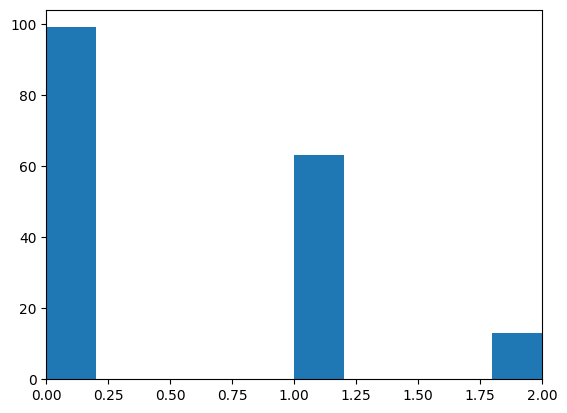

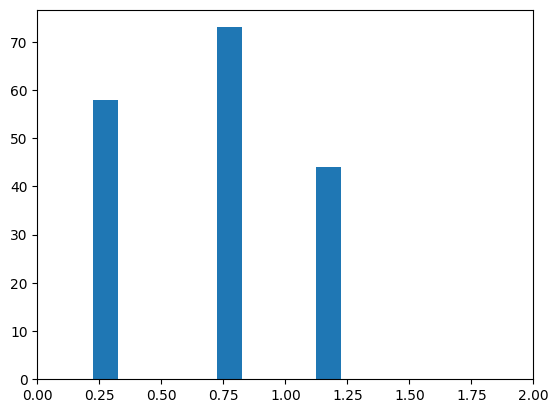

In [ ]:
import matplotlib.pyplot as plt
#simple histogram of errors
# our model's predictions
plt.hist((abs(test_y - pred_test_y)))
plt.xlim(0, 2)
plt.show()

# if we just used the average rating
plt.hist((abs(test_y - train_y.mean())))
plt.xlim(0, 2)
plt.show()

In [ ]:
# data analysis (for the slides)
map_center = [sum(merged_restaurant['latitude']) / len(merged_restaurant['latitude']), sum(merged_restaurant['longitude']) / len(merged_restaurant['longitude'])]

mymap = folium.Map(location=map_center, zoom_start=4, control_scale=True)

# Add markers for each point
for lat, lon in zip(merged_restaurant['latitude'], merged_restaurant['longitude']):
    folium.Marker([lat, lon]).add_to(mymap)

# Display the map
mymap

KeyError: 'latitude'

In [ ]:
# data analysis (for the slides)
# Create a scatter plot
map_center = [sum(merged_user['latitude']) / len(merged_user['latitude']), sum(merged_user['longitude']) / len(merged_user['longitude'])]

# Add markers for each point
for lat, lon in zip(merged_user['latitude'], merged_user['longitude']):
    folium.Marker([lat, lon]).add_to(mymap)

# Display the map
mymap